In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

#import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [44]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).\

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build Query URL
query_url = url + "appid=" + api_key + "&units" + units + "&q="


In [45]:
#Get Weather Data
weather_response = requests.get(query_url + "Paris")
weather_json = weather_response.json()
print(json.dumps(weather_json,indent=4,sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 48.86,
        "lon": 2.35
    },
    "dt": 1572144118,
    "id": 2988507,
    "main": {
        "humidity": 77,
        "pressure": 1016,
        "temp": 287.53,
        "temp_max": 289.15,
        "temp_min": 286.15
    },
    "name": "Paris",
    "sys": {
        "country": "FR",
        "id": 6540,
        "sunrise": 1572157725,
        "sunset": 1572194402,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 2.6
    }
}


In [46]:
#Create lists to append the API data 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#begin counter
record = 1

#Begin For Loop
for city in cities:
    try:
        weather_data = requests.get(query_url + city).json()
        city_name.append(weather_data['name'])
        cloudiness.append(weather_data['clouds']['all'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        humidity.append(weather_data['main']['humidity'])
        lat.append(weather_data['coord']['lat'])
        lng.append(weather_data['coord']['lon'])
        max_temp.append(weather_data['main']['temp_max'])
        wind_speed.append(weather_data['wind']['speed'])
        city_record = weather_data['name']
        print(f"Processing Record {record} | {city_record}")

        #increase counter by 1
        record = record + 1
    except:
        print("City not found | SKipping....")
    time.sleep(1.5)

Processing Record 1 | Rikitea
Processing Record 2 | Vaini
Processing Record 3 | Yar-Sale
Processing Record 4 | Atuona
Processing Record 5 | Hilo
Processing Record 6 | Raudeberg
Processing Record 7 | Bredasdorp
Processing Record 8 | Yaan
Processing Record 9 | Port-Gentil
Processing Record 10 | Bambous Virieux
Processing Record 11 | Ingham
Processing Record 12 | East London
Processing Record 13 | Albany
Processing Record 14 | Poum
Processing Record 15 | Ternate
Processing Record 16 | Punta Arenas
Processing Record 17 | Ouadda
Processing Record 18 | Tuktoyaktuk
Processing Record 19 | Mataura
Processing Record 20 | Busselton
Processing Record 21 | Tasiilaq
Processing Record 22 | Havelock
Processing Record 23 | Hermanus
City not found | SKipping....
City not found | SKipping....
Processing Record 24 | Okhotsk
Processing Record 25 | Port Alfred
Processing Record 26 | Buala
Processing Record 27 | San Cristobal
Processing Record 28 | High Level
Processing Record 29 | Arraial do Cabo
Processing

City not found | SKipping....
Processing Record 228 | Iquitos
City not found | SKipping....
Processing Record 229 | Kaeo
Processing Record 230 | Richards Bay
Processing Record 231 | Anshun
Processing Record 232 | Faanui
Processing Record 233 | Vestmannaeyjar
Processing Record 234 | Portland
Processing Record 235 | Forbes
Processing Record 236 | Aklavik
Processing Record 237 | Teya
Processing Record 238 | Fairbanks
City not found | SKipping....
Processing Record 239 | Cao Bang
Processing Record 240 | Yacuiba
Processing Record 241 | Dinar
Processing Record 242 | Julfa
Processing Record 243 | Cacule
Processing Record 244 | Leshukonskoye
Processing Record 245 | Pacific Grove
Processing Record 246 | Smidovich
Processing Record 247 | Inyonga
Processing Record 248 | Bundibugyo
Processing Record 249 | Yulara
Processing Record 250 | Sitka
Processing Record 251 | Panama City
Processing Record 252 | Springbok
Processing Record 253 | Harper
Processing Record 254 | Pangnirtung
Processing Record 255

Processing Record 455 | La Palma
Processing Record 456 | Beyneu
Processing Record 457 | Fort Wellington
Processing Record 458 | Khorixas
Processing Record 459 | Solwezi
City not found | SKipping....
Processing Record 460 | Eureka
City not found | SKipping....
Processing Record 461 | Hambantota
Processing Record 462 | Libreville
Processing Record 463 | Kupang
Processing Record 464 | Vila Velha
Processing Record 465 | Farmington
Processing Record 466 | Kutum
Processing Record 467 | Nome
Processing Record 468 | Hingham
City not found | SKipping....
Processing Record 469 | Kinlochleven
City not found | SKipping....
Processing Record 470 | Burnie
City not found | SKipping....
Processing Record 471 | Kirakira
Processing Record 472 | Jijiang
Processing Record 473 | Clearlake
Processing Record 474 | Bose
Processing Record 475 | Bethel
Processing Record 476 | High Rock
Processing Record 477 | Dasoguz
Processing Record 478 | Balagansk
Processing Record 479 | Fayetteville
Processing Record 480 | 

In [47]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

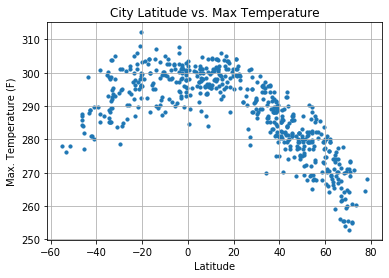

In [48]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

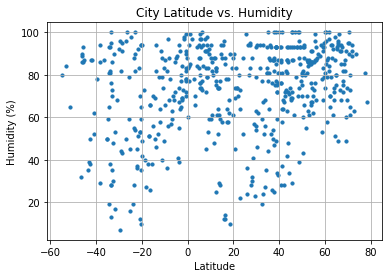

In [49]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#plot
plt.show()


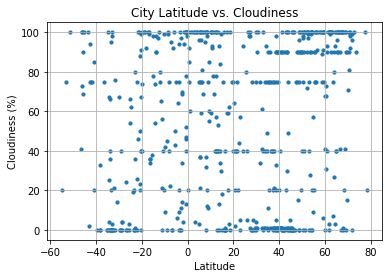

In [50]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

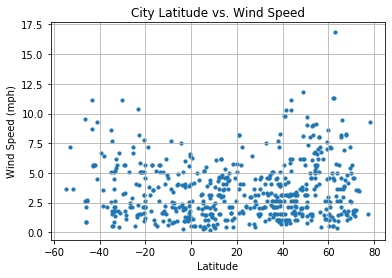

In [51]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Show plot
plt.show()

In [ ]:
#Observations
1.Cloudiness and humidity show no correlation to latitude.
2.The majority of cities have a windspeed under 10 mph.
3.temperature is warmer as you approach the equator(0).


